In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib

# Data properties

Here we want to collect some general insights that we concluded and which might be interesting for working with the data.

This will be extended soon.

In [220]:
data = pd.read_csv("product/rivers_ts_east_germany.csv", index_col=0)
data2 = pd.read_csv("product/rivers_ts_bavaria.csv", index_col=0)


In [221]:
data3 = pd.read_csv("product/rivers_ts_flood.csv", index_col=0)

In [222]:
color = ["#5ec962", "#3b528b"]

In [223]:
def distribution(distribution, ax_main, fig, placement,percentile=95, name= "BA", color=["#FFA07A", "#4682B4"], x_label="Mean Discharge between 2019 and 2023", log_scale=True,n_bins=50):

        barrier = np.percentile(distribution, [0,percentile])[1]
        # Plot for main data



        ax_main.hist(distribution[(distribution <= barrier)], bins=n_bins, color= color[1], edgecolor="black")
        ax_main.set_title(name)
        if log_scale:
                ax_main.set_yscale('log')
        ax_main.set_xlabel(x_label)
        ax_main.set_ylabel("Number of time series")
        #ax_main.text(3,20,"Bottom " +  str(percentile) + "% Percentile", fontsize=10)
        if percentile != 100:
                inset_axes = fig.add_axes(placement)  
                outliers = distribution[distribution > barrier]
                inset_axes.hist(outliers, bins=20, color=color[0], edgecolor="black")
                inset_axes.set_yscale('log')
                #inset_axes.set_xlabel("Mean Discharge")
                inset_axes.get_yaxis().set_major_formatter(
                matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                inset_axes.set_title("Top " +  str(100-percentile) + "% Percentile", fontsize=10)
                return inset_axes
        else:
                return None

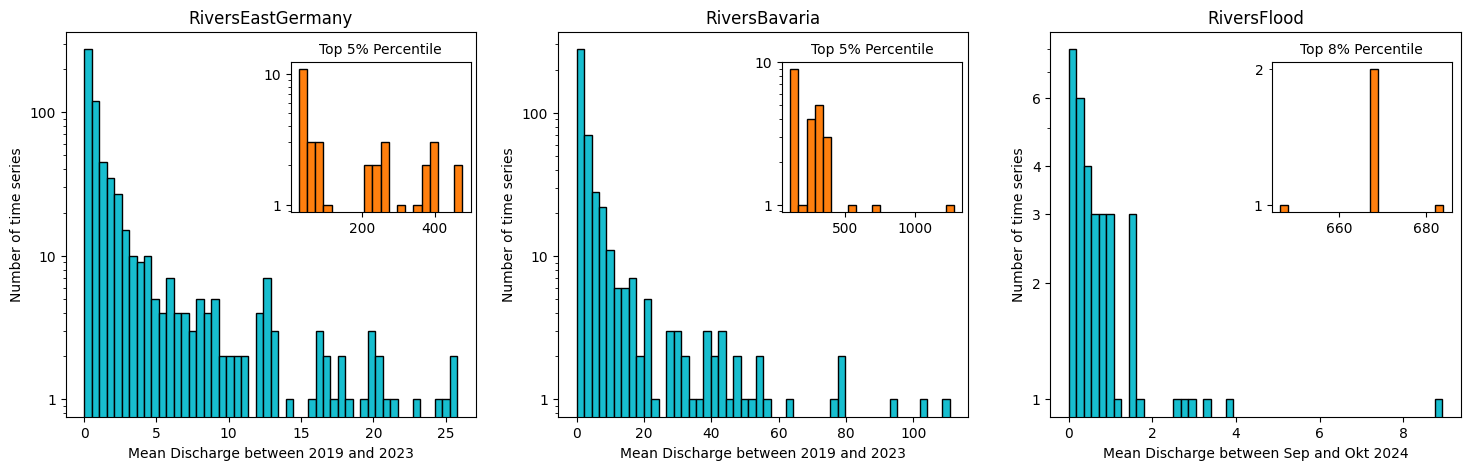

In [321]:
fig, ax_main = plt.subplots(1,3,figsize=(18, 5))
in_ax = distribution(data.mean().values, ax_main[0], fig, placement = [0.25, 0.52, 0.1, 0.3],name="RiversEastGermany", color = ["C1", "C9"])
in_ax2 = distribution(data2.mean().values, ax_main[1], fig, placement = [0.523, 0.52, 0.1, 0.3],name="RiversBavaria", color = ["C1", "C9"])
in_ax3 = distribution(data3.mean().values, ax_main[2], fig, placement = [0.795, 0.52, 0.1, 0.3], percentile=92,name="RiversFlood", x_label="Mean Discharge between Sep and Okt 2024", color = ["C1", "C9"])

ax_main[0].set_yticks([1,10,100],[1,10,100])
ax_main[1].set_yticks([1,10,100],[1,10,100])
ax_main[2].set_yticks([1,2,3,4,6],[1,2,3,4,6])
in_ax3.yaxis.set_ticks([1,2],[1,2], minor=True) 


fig.savefig("graphics/mean_discharge.pdf",bbox_inches='tight')

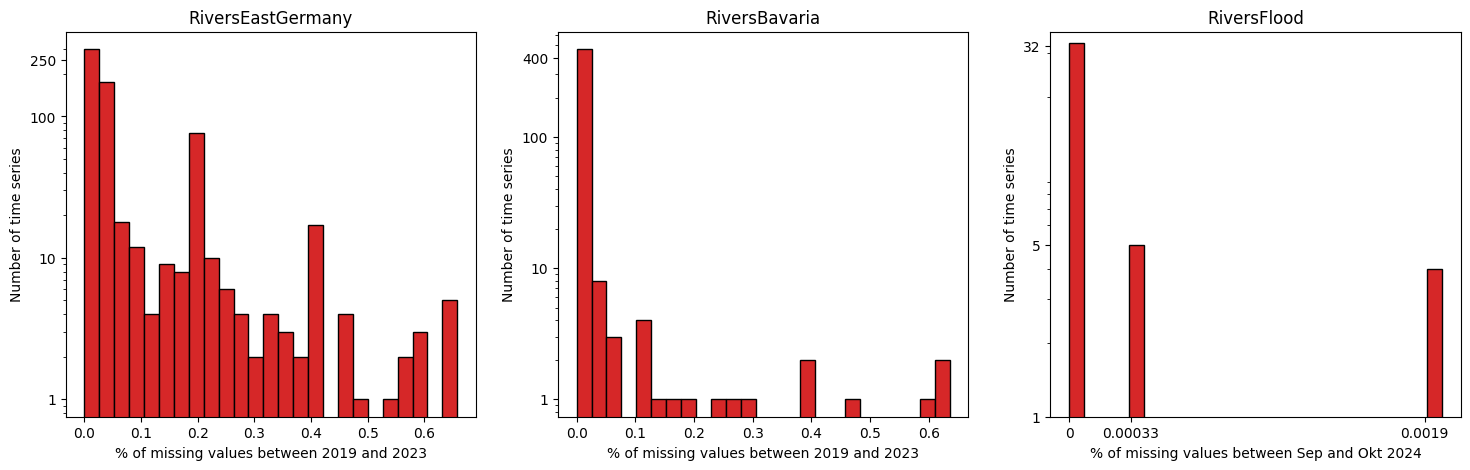

In [265]:
fig, ax_main = plt.subplots(1,3,figsize=(18, 5))
in_ax = distribution((data.isnull().sum() /len(data)).values, ax_main[0], fig, placement = [0.25, 0.52, 0.1, 0.3], percentile=100,name="RiversEastGermany", x_label="% of missing values between 2019 and 2023", color = [None, "C3"], n_bins=25)
in_ax2 = distribution((data2.isnull().sum() /len(data2)).values, ax_main[1], fig, placement = [0.523, 0.52, 0.1, 0.3], percentile=100,name="RiversBavaria", x_label="% of missing values between 2019 and 2023", color = [None,"C3"], n_bins=25)
in_ax3 = distribution((data3.isnull().sum() /len(data3)).values, ax_main[2], fig, placement = [0.795, 0.52, 0.1, 0.3], percentile=100,name="RiversFlood", x_label="% of missing values between Sep and Okt 2024" , color = [None,"C3"], n_bins=25)

ax_main[0].set_yticks([1,10,100,250],[1,10,100,250])
ax_main[1].set_yticks([1,10,100,400],[1,10,100,400])
ax_main[2].set_yticks([1,5,32],[1,5,32])
ax_main[2].set_xticks([0,0.00033,0.0019],[0,0.00033,0.0019])

fig.savefig("graphics/missing_values.pdf",bbox_inches='tight')

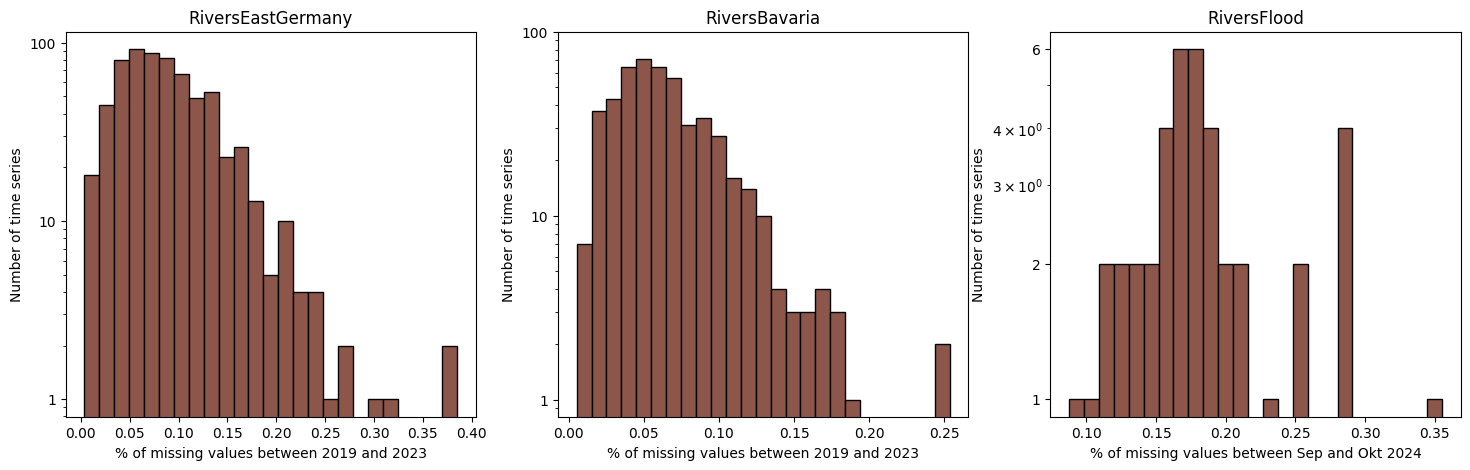

In [320]:
fig, ax_main = plt.subplots(1,3,figsize=(18, 5))

d = data
in_ax = distribution(((d- d.min()) / (d.max()- d.min())).std().values, ax_main[0], fig, placement = [0.25, 0.52, 0.1, 0.3], percentile=100,name="RiversEastGermany", x_label="% of missing values between 2019 and 2023", color = [None,"C5"], n_bins=25)
d = data2
in_ax2= distribution(((d- d.min()) / (d.max()- d.min())).std().values, ax_main[1], fig, placement = [0.523, 0.52, 0.1, 0.3], percentile=100,name="RiversBavaria", x_label="% of missing values between 2019 and 2023", color = [None,"C5"], n_bins=25)
d = data3
in_ax3 = distribution(((d- d.min()) / (d.max()- d.min())).std().values, ax_main[2], fig, placement = [0.795, 0.52, 0.1, 0.3], percentile=100,name="RiversFlood", x_label="% of missing values between Sep and Okt 2024" , color = [None,"C5"], n_bins=25)


ax_main[0].set_yticks([1,10,100],[1,10,100])
ax_main[1].set_yticks([1,10,100],[1,10,100])
ax_main[2].set_yticks([1,2,6],[1,2,6])


fig.savefig("graphics/normalized_std.pdf",bbox_inches='tight')

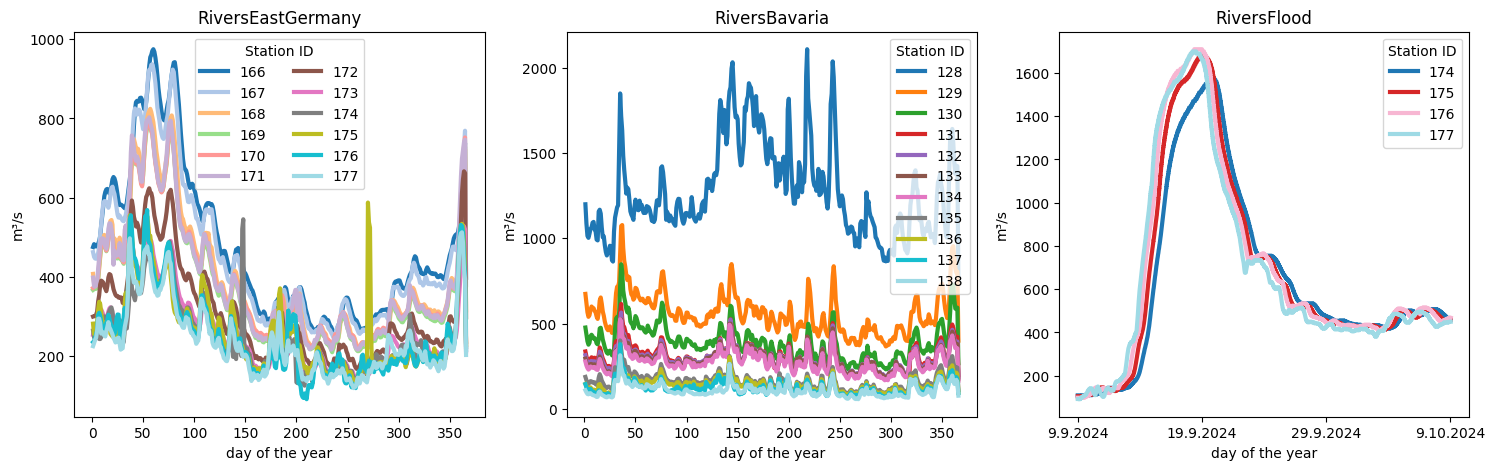

In [227]:
fig, ax_main = plt.subplots(1, 3, figsize=(18, 5))


meta = pd.read_csv("product/rivers_meta_east_germany.csv")
elbe = meta[meta["R"] == "Elbe"].ID.values.astype(str)
big_seasonal = data[[x for x in data.columns if x in elbe]]
big_seasonal.index = pd.to_datetime(big_seasonal.index).day_of_year
big_seasonal = big_seasonal.reset_index().groupby("datetime").mean()
big_seasonal.plot(colormap="tab20", linewidth=3, ax=ax_main[0])
ax_main[0].legend(title="Station ID", loc=0, ncol=2)

meta = pd.read_csv("product/rivers_meta_bavaria.csv")
donau = meta[meta["R"] == "Donau"].ID.values.astype(str)
big_seasonal = data2[[x for x in data2.columns if x in donau]]
big_seasonal.index = pd.to_datetime(big_seasonal.index).day_of_year
big_seasonal = big_seasonal.reset_index().groupby("datetime").mean()
big_seasonal.plot(colormap="tab20", linewidth=3, ax=ax_main[1])
ax_main[1].legend(title="Station ID", loc=1, ncol=1)
data3[[x for x in data3.columns if x in elbe]].plot(
    colormap="tab20", linewidth=3, ax=ax_main[2]
)
ax_main[2].legend(title="Station ID", loc=1)
ax_main[0].set_title("RiversEastGermany")
ax_main[1].set_title("RiversBavaria")
ax_main[2].set_title("RiversFlood")

ax_main[2].set_xticks([0,1000,2000,3000],["9.9.2024","19.9.2024","29.9.2024","9.10.2024"])

for x in range(3):
    ax_main[x].set_ylabel("m³/s")
    ax_main[x].set_xlabel("day of the year")
    
fig.savefig("graphics/large_annual.pdf",bbox_inches='tight')

/tmp/ipykernel_1526326/912216553.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_main.set_xticklabels(ax_main.get_xticklabels(), fontsize=14)


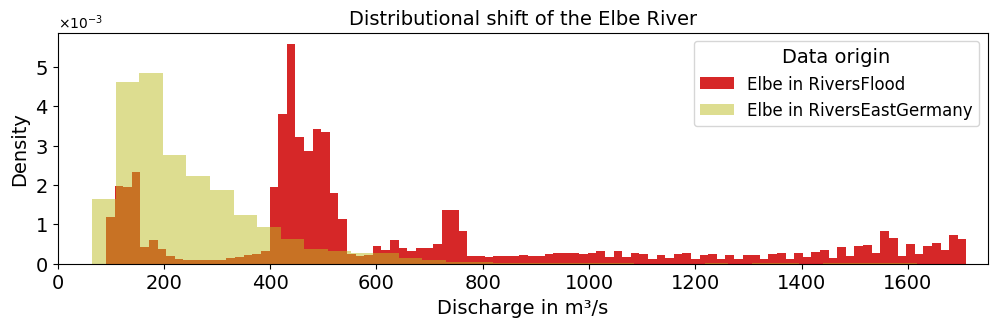

In [403]:
fig, ax_main = plt.subplots(1, 1, figsize=(12, 3))


plt.hist(data3[[x for x in data3.columns if x in elbe]].values.flatten(), density=True,bins=100, color="C3",alpha=1, label="Elbe in RiversFlood")
plt.hist(data[[x for x in data3.columns if x in elbe]].values.flatten(), density=True, bins=100, color="C8",alpha=0.5, label="Elbe in RiversEastGermany")

ax_main.set_xlim(0,1750)

ax_main.set_xlabel("Discharge in m³/s", fontsize=14)
ax_main.set_ylabel("Density", fontsize=14)

legend = ax_main.legend(title= "Data origin",title_fontsize=14, fontsize=12)


ax_main.set_title("Distributional shift of the Elbe River", fontsize=14)

ax_main.ticklabel_format(axis='y', style='scientific', scilimits=(4,1),useMathText=True)
ax_main.set_xticklabels(ax_main.get_xticklabels(), fontsize=14)


plt.yticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)


fig.savefig("graphics/shift_elbe.pdf",bbox_inches='tight')



In [395]:
ax_main.get_yticklabels()

[Text(0, 0.0, '$\\mathdefault{0}$'),
 Text(0, 0.001, '$\\mathdefault{1}$'),
 Text(0, 0.002, '$\\mathdefault{2}$'),
 Text(0, 0.003, '$\\mathdefault{3}$'),
 Text(0, 0.004, '$\\mathdefault{4}$'),
 Text(0, 0.005, '$\\mathdefault{5}$'),
 Text(0, 0.006, '$\\mathdefault{6}$')]

In [228]:
G_ew = pickle.load(open("product/rivers_east_germany.p", "rb"))
G_b = pickle.load(open("product/rivers_bavaria.p", "rb"))
G_f = pickle.load(open("product/rivers_flood.p", "rb"))

In [241]:
ew = pd.DataFrame([len(list(G_ew.predecessors(x))) for x in G_ew.nodes]).value_counts().astype(str).str.replace(".0", "")
b = pd.DataFrame([len(list(G_b.predecessors(x))) for x in G_b.nodes]).value_counts().astype(str).str.replace(".0", "")
f = pd.DataFrame([len(list(G_f.predecessors(x))) for x in G_f.nodes]).value_counts().astype(str).str.replace(".0", "")

prec = pd.concat([ew,b,f],axis=1).T
prec.index = ["RiversEastGermany", "RiversBavaria", "RiversFlood"]
prec = prec.replace(np.nan, "-")
prec = prec[np.arange(11)]

In [242]:
ew2 = pd.DataFrame([len(list(G_ew.successors(x))) for x in G_ew.nodes]).value_counts().astype(str).str.replace(".0", "")
b2 = pd.DataFrame([len(list(G_b.successors(x))) for x in G_b.nodes]).value_counts().astype(str).str.replace(".0", "")
f2 = pd.DataFrame([len(list(G_f.successors(x))) for x in G_f.nodes]).value_counts().astype(str).str.replace(".0", "")

suc = pd.concat([ew2,b2,f2],axis=1).T
suc.index = ["RiversEastGermany", "RiversBavaria", "RiversFlood"]
suc = suc.replace(np.nan, "-")
suc = suc[[0,1,2,3,4]]

In [243]:
print(pd.concat([prec,suc], axis=1).to_latex())

\begin{tabular}{lllllllllllllllll}
\toprule
0 & (0,) & (1,) & (2,) & (3,) & (4,) & (5,) & (6,) & (7,) & (8,) & (9,) & (10,) & (0,) & (1,) & (2,) & (3,) & (4,) \\
\midrule
RiversEastGermany & 296 & 206 & 108 & 26 & 16 & 5 & 6 & 1 & - & 1 & 1 & 44 & 596 & 24 & 1 & 1 \\
RiversBavaria & 257 & 110 & 64 & 34 & 15 & 2 & 7 & 2 & 3 & - & - & 19 & 462 & 11 & 2 & - \\
RiversFlood & 23 & 13 & 3 & - & 1 & - & - & - & - & 1 & 1 & 1 & 40 & 1 & - & - \\
\bottomrule
\end{tabular}

